Data has been successfully written to the database.

Slytherin Students:
('Half-blood', 7, 6, 2, 8, 10, 9, 7, 3, 'Slytherin')
('Pure-blood', 6, 6, 7, 7, 9, 5, 9, 2, 'Slytherin')
('Muggle-born', 7, 7, 6, 8, 8, 7, 8, 5, 'Slytherin')
('Pure-blood', 4, 3, 7, 8, 10, 7, 8, 3, 'Slytherin')
('Muggle-born', 1, 6, 1, 9, 8, 9, 10, 1, 'Slytherin')

Muggle-born students from Gryffindor:
('Muggle-born', 9, 6, 4, 1, 4, 6, 7, 2, 'Gryffindor')
('Muggle-born', 7, 4, 2, 7, 0, 6, 9, 5, 'Gryffindor')
('Muggle-born', 8, 4, 1, 5, 1, 6, 8, 4, 'Gryffindor')
('Muggle-born', 10, 3, 6, 2, 2, 10, 7, 3, 'Gryffindor')
('Muggle-born', 9, 1, 2, 4, 1, 6, 10, 5, 'Gryffindor')
('Muggle-born', 8, 7, 3, 6, 1, 6, 9, 6, 'Gryffindor')
('Muggle-born', 8, 4, 5, 7, 0, 7, 10, 1, 'Gryffindor')
('Muggle-born', 10, 3, 4, 2, 1, 7, 10, 3, 'Gryffindor')
('Muggle-born', 8, 7, 3, 1, 0, 9, 10, 4, 'Gryffindor')
('Muggle-born', 9, 7, 1, 6, 1, 7, 7, 5, 'Gryffindor')
('Muggle-born', 9, 1, 6, 3, 1, 10, 9, 4, 'Gryffindor')
('Muggle-born', 10, 2

blood status (Muggle-born, Pure-blood, Half-blood):  Half-blood
Bravery (0-10):  5
Intelligence (0-10):  4
Loyalty (0-10):  7
Ambition (0-10):  6
Dark Arts Knowledge (0-10):  8
Quidditch Skills (0-10):  9
Dueling Skills (0-10):  10
Creativity (0-10):  3
House (Gryffindor, Slytherin, Ravenclaw, Hufflepuff):  Ravenclaw


The students has been added.

Database updated.

Removing every student whose Loyalty points is below 3.

Ordering students by blood status:
('Half-blood', 9, 4, 7, 5, 0, 8, 8, 7, 'Gryffindor')
('Pure-blood', 9, 1, 3, 4, 1, 9, 10, 1, 'Gryffindor')
('Pure-blood', 9, 3, 5, 5, 3, 10, 8, 4, 'Gryffindor')
('Pure-blood', 10, 7, 3, 7, 1, 8, 9, 3, 'Gryffindor')
('Pure-blood', 7, 5, 7, 7, 0, 6, 9, 2, 'Gryffindor')
('Half-blood', 8, 4, 7, 3, 3, 9, 9, 3, 'Gryffindor')
('Half-blood', 7, 7, 3, 7, 3, 5, 10, 5, 'Gryffindor')
('Pure-blood', 8, 7, 3, 1, 0, 7, 9, 6, 'Gryffindor')
('Half-blood', 10, 6, 5, 3, 3, 5, 9, 2, 'Gryffindor')
('Muggle-born', 9, 6, 4, 1, 4, 6, 7, 2, 'Gryffindor')

Connection to the database has been turned off.


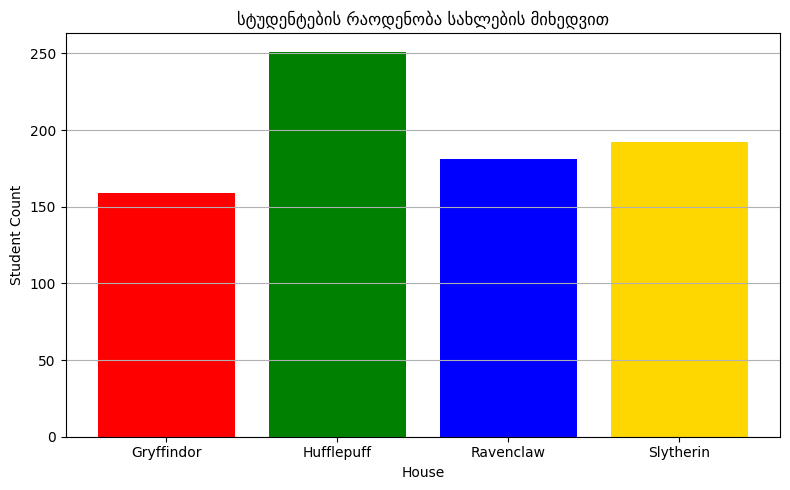

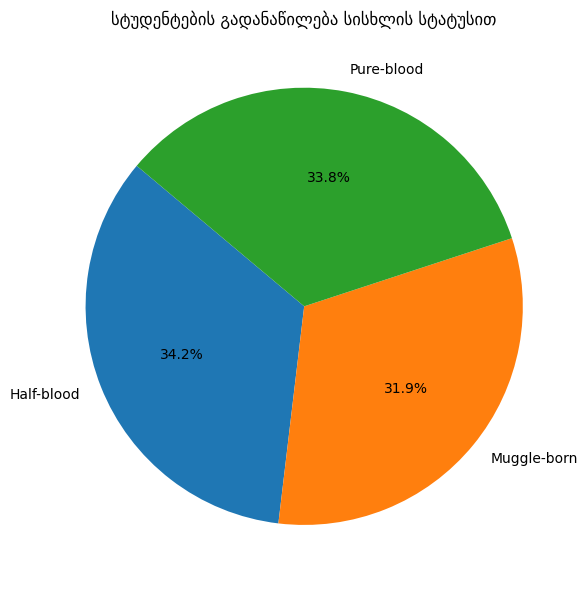

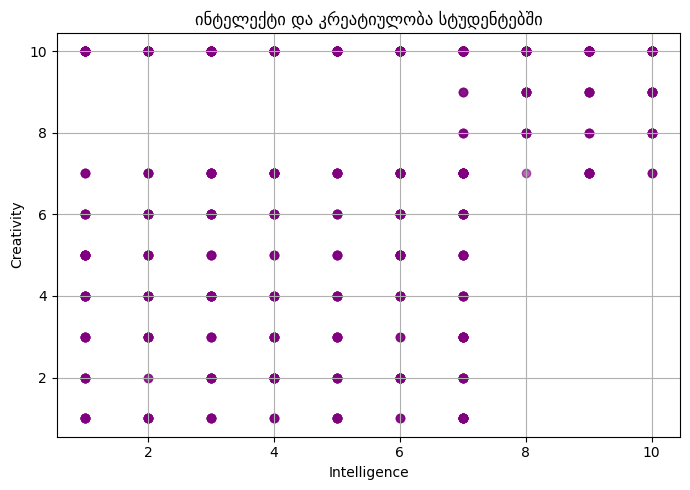

In [1]:
import sqlite3
import csv

# ბაზასთან დაკავშირება და ცხრილის შექმნა
conn = sqlite3.connect("harry_potter.db")
cursor = conn.cursor()

# ცხრილის წაშლა, თუ უკვე არსებობს (ხელახალი გაშვების შემთხვევაში)
cursor.execute("DROP TABLE IF EXISTS students")

# ცხრილის შექმნა
cursor.execute("""
    CREATE TABLE students (
        "Blood Status" TEXT,
        Bravery INTEGER,
        Intelligence INTEGER,
        Loyalty INTEGER,
        Ambition INTEGER,
        "Dark Arts Knowledge" INTEGER,
        "Quidditch Skills" INTEGER,
        "Dueling Skills" INTEGER,
        Creativity INTEGER,
        House TEXT
    )
""")

# CSV ფაილიდან მონაცემების ჩასმა (ფაილი უნდა იდოს იმავე საქაღალდეში)
with open('/Users/macbookair/Downloads/harry_potter_1000_students 2.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        cursor.execute("""
            INSERT INTO students (
                "Blood Status", Bravery, Intelligence, Loyalty, Ambition,
                "Dark Arts Knowledge", "Quidditch Skills", "Dueling Skills", Creativity, House
            ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """, (
            row["Blood Status"],
            int(row["Bravery"]),
            int(row["Intelligence"]),
            int(row["Loyalty"]),
            int(row["Ambition"]),
            int(row["Dark Arts Knowledge"]),
            int(row["Quidditch Skills"]),
            int(row["Dueling Skills"]),
            int(row["Creativity"]),
            row["House"]
        ))

conn.commit()
print("Data has been successfully written to the database.\n")

# ვნიშნავთ და ვასელექთებთ ყველა იმ სტუდენტს ვინც სლიზერინშია
print("Slytherin Students:")
cursor.execute("SELECT * FROM students WHERE House = 'Slytherin'")
for row in cursor.fetchmany(5):
    print(row)

# Muggle-born სტუდენტები Gryffindor-იდან
print("\nMuggle-born students from Gryffindor:")
cursor.execute('''
    SELECT * FROM students
    WHERE [Blood Status] = 'Muggle-born' AND House = 'Gryffindor'
''')

results = cursor.fetchall()
for row in results:
    print(row)

# მომხმარებლის მიერ შემოტანილი ახალი სტუდენტი
print("\nNew Students:")
blood_status = input("blood status (Muggle-born, Pure-blood, Half-blood): ")
bravery = int(input("Bravery (0-10): "))
intelligence = int(input("Intelligence (0-10): "))
loyalty = int(input("Loyalty (0-10): "))
ambition = int(input("Ambition (0-10): "))
dark_arts = int(input("Dark Arts Knowledge (0-10): "))
quidditch = int(input("Quidditch Skills (0-10): "))
dueling = int(input("Dueling Skills (0-10): "))
creativity = int(input("Creativity (0-10): "))
house = input("House (Gryffindor, Slytherin, Ravenclaw, Hufflepuff): ")

cursor.execute("""
    INSERT INTO students (
        "Blood Status", Bravery, Intelligence, Loyalty, Ambition,
        "Dark Arts Knowledge", "Quidditch Skills", "Dueling Skills", Creativity, House
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
""", (blood_status, bravery, intelligence, loyalty, ambition, dark_arts, quidditch, dueling, creativity, house))
conn.commit()
print("The students has been added.\n")

# ვზრდით Creativity-ს იმ სტუდენტებზე, ვისაც bravery < 4
cursor.execute("""
    UPDATE students 
    SET Creativity = 10 
    WHERE Bravery < 4
""")
conn.commit()
print("Database updated.\n")

# იმ სტუდენტების ცხრილიდან ამოშლა ვისაც ერთგულების ქულები სამზე ნაკლები აქვთ
cursor.execute("""
    DELETE FROM students WHERE Loyalty < 3
""")
conn.commit()
print("Removing every student whose Loyalty points is below 3.\n")

# სახლების მიხედვით დალაგება
print("Ordering students by blood status:")
cursor.execute("""
    SELECT * FROM students
    ORDER BY 
        CASE House
            WHEN 'Gryffindor' THEN 1
            WHEN 'Slytherin' THEN 2
            WHEN 'Ravenclaw' THEN 3
            WHEN 'Hufflepuff' THEN 4
            ELSE 5
        END
""")
for row in cursor.fetchmany(10):
    print(row)

# ვთიშავთ ბაზას
conn.close()
print("\nConnection to the database has been turned off.")



import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect('harry_potter.db')
cursor = conn.cursor()

# Bar Chart: სახლების მიხედვით სტუდენტების რაოდენობა
cursor.execute('''
    SELECT House, COUNT(*) FROM students GROUP BY House
''')
data = cursor.fetchall()

houses = [row[0] for row in data]
counts = [row[1] for row in data]

plt.figure(figsize=(8, 5))
plt.bar(houses, counts, color=['red', 'green', 'blue', 'gold'])
plt.title('სტუდენტების რაოდენობა სახლების მიხედვით')
plt.xlabel('House')
plt.ylabel('Student Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Pie Chart: სისხლის სტატუსის მიხედვით
cursor.execute('''
    SELECT [Blood Status], COUNT(*) FROM students GROUP BY [Blood Status]
''')
blood_data = cursor.fetchall()

statuses = [row[0] for row in blood_data]
status_counts = [row[1] for row in blood_data]

plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=statuses, autopct='%1.1f%%', startangle=140)
plt.title('სტუდენტების გადანაწილება სისხლის სტატუსით')
plt.axis('equal')
plt.tight_layout()
plt.show()

# ინტელექტი და კრეატიულობა
cursor.execute('''
    SELECT Intelligence, Creativity FROM students
''')
scatter_data = cursor.fetchall()

intelligence = [row[0] for row in scatter_data]
creativity = [row[1] for row in scatter_data]

plt.figure(figsize=(7, 5))
plt.scatter(intelligence, creativity, alpha=0.6, color='purple')
plt.title('ინტელექტი და კრეატიულობა სტუდენტებში')
plt.xlabel('Intelligence')
plt.ylabel('Creativity')
plt.grid(True)
plt.tight_layout()
plt.show()

conn.close()